# 🏗️ 기본 세팅

## 패키지 설치

In [ ]:
!pip install pymysql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 1.9 MB/s eta 0:00:00


## MySQL 접속 정보 넣기

In [ ]:
import pymysql


# 여기에 본인 Aiven 정보를 넣으세요
host = "mysql-24ebf963-mysql-1234567123.d.aivencloud.com"
user = "avnadmin"
password = "AVNS_OYG081Bn0l7doBIHiF1"
database = "defaultdb"
port = 18861

conn = pymysql.connect(
    host=host,
    user=user,
    password=password,
    db=database,
    port=port,
    charset='utf8'
)

cursor = conn.cursor()
print("Connected MySQL!")

Connected MySQL!


## 테이블 생성 및 데이터 삽입

In [ ]:
# 테이블 생성
tables_to_create = {
    'patients': """CREATE TABLE IF NOT EXISTS patients (
        patient_id INT PRIMARY KEY,
        name VARCHAR(255) NOT NULL,
        gender VARCHAR(10),
        birth_date DATE
    )""",
    'visits': """CREATE TABLE IF NOT EXISTS visits (
        visit_id INT PRIMARY KEY,
        patient_id INT NOT NULL,
        visit_date DATE,
        reason VARCHAR(255),
        FOREIGN KEY (patient_id) REFERENCES patients(patient_id)
    )""",
    'vitals': """CREATE TABLE IF NOT EXISTS vitals (
        vitals_id INT PRIMARY KEY,
        visit_id INT NOT NULL,
        blood_pressure VARCHAR(20),
        heart_rate INT,
        temperature DECIMAL(5,2),
        weight DECIMAL(5,2),
        height DECIMAL(5,2),
        FOREIGN KEY (visit_id) REFERENCES visits(visit_id)
    )""",
    'labs': """CREATE TABLE IF NOT EXISTS labs (
        lab_id INT PRIMARY KEY,
        visit_id INT NOT NULL,
        test_name VARCHAR(255) NOT NULL,
        result VARCHAR(255),
        result_date DATE,
        FOREIGN KEY (visit_id) REFERENCES visits(visit_id)
    )"""
}

for table_name, create_statement in tables_to_create.items():
    try:
        cursor.execute(create_statement)
        conn.commit()
        print(f"Table '{table_name}' created or already exists successfully.")
    except pymysql.Error as e:
        print(f"Error creating table '{table_name}': {e}")
        conn.rollback()

Table 'patients' created or already exists successfully.
Table 'visits' created or already exists successfully.
Table 'vitals' created or already exists successfully.
Table 'labs' created or already exists successfully.


In [ ]:
# 데이터 삽입
sample_data = {
    'patients': [
        (1, 'John Doe', 'Male', '1980-05-15'),
        (2, 'Jane Smith', 'Female', '1992-11-23'),
        (3, 'Peter Jones', 'Male', '1975-03-10'),
        (4, 'Alice Brown', 'Female', '2000-07-01'),
        (5, 'Robert White', 'Male', '1968-09-20')
    ],
    'visits': [
        (101, 1, '2023-01-10', 'Annual check-up'),
        (102, 2, '2023-01-15', 'Fever and cough'),
        (103, 1, '2023-02-01', 'Follow-up on blood pressure'),
        (104, 3, '2023-02-05', 'Knee pain'),
        (105, 4, '2023-02-10', 'Vaccination'),
        (106, 5, '2023-03-01', 'Diabetes management'),
        (107, 2, '2023-03-10', 'Persistent cough')
    ],
    'vitals': [
        (1001, 101, '120/80', 72, 36.5, 75.2, 175.0),
        (1002, 102, '130/85', 98, 38.1, 60.5, 160.0),
        (1003, 103, '125/80', 70, 36.7, 74.8, 175.0),
        (1004, 104, '118/75', 65, 36.8, 80.1, 180.0),
        (1005, 105, '110/70', 80, 37.0, 55.3, 165.0),
        (1006, 106, '140/90', 78, 36.6, 90.0, 170.0),
        (1007, 107, '128/82', 90, 37.5, 61.0, 160.0)
    ],
    'labs': [
        (2001, 101, 'Complete Blood Count', 'Normal', '2023-01-11'),
        (2002, 102, 'C-Reactive Protein', 'Elevated', '2023-01-16'),
        (2003, 103, 'Cholesterol', 'High', '2023-02-02'),
        (2004, 106, 'HbA1c', '7.2%', '2023-03-02'),
        (2005, 107, 'Chest X-ray', 'Clear', '2023-03-11')
    ]
}

insert_statements = {
    'patients': "INSERT INTO patients (patient_id, name, gender, birth_date) VALUES (%s, %s, %s, %s)",
    'visits': "INSERT INTO visits (visit_id, patient_id, visit_date, reason) VALUES (%s, %s, %s, %s)",
    'vitals': "INSERT INTO vitals (vitals_id, visit_id, blood_pressure, heart_rate, temperature, weight, height) VALUES (%s, %s, %s, %s, %s, %s, %s)",
    'labs': "INSERT INTO labs (lab_id, visit_id, test_name, result, result_date) VALUES (%s, %s, %s, %s, %s)"
}

for table_name, data_rows in sample_data.items():
    try:
        cursor.executemany(insert_statements[table_name], data_rows)
        conn.commit()
        print(f"Successfully inserted data into '{table_name}' table.")
    except pymysql.Error as e:
        print(f"Error inserting data into '{table_name}' table: {e}")
        conn.rollback()


Successfully inserted data into 'patients' table.
Successfully inserted data into 'visits' table.
Successfully inserted data into 'vitals' table.
Successfully inserted data into 'labs' table.


# 📝 연습하기

* `with conn.cursor() as cur`
  - with문을 사용하면 커서(cur)를 자동으로 열고 닫기
  - 블록을 벗어나면 커서가 자동 close되므로 자원 관리가 안전하고 깔끔함

* `execute()`
  - SQL 문을 실행하는 함수
  - SELECT, INSERT, UPDATE, DELETE 등 모든 쿼리 실행에 사용됨

* `%s` (파라미터 플레이스홀더)
  - SQL에 값을 안전하게 넣기 위한 placeholder
  - `execute(sql, (값, ))` 형태로 전달하며 SQL 인젝션 방지 효과 있음

* `fetchall()`
  - SELECT 결과의 모든 행(row)을 한 번에 가져옴
  - 여러 개의 데이터를 조회할 때 사용

* `fetchone()`
  - SELECT 결과 중 첫 번째 행만 가져옴
  - 단일 데이터 조회 시 사용


## ERD
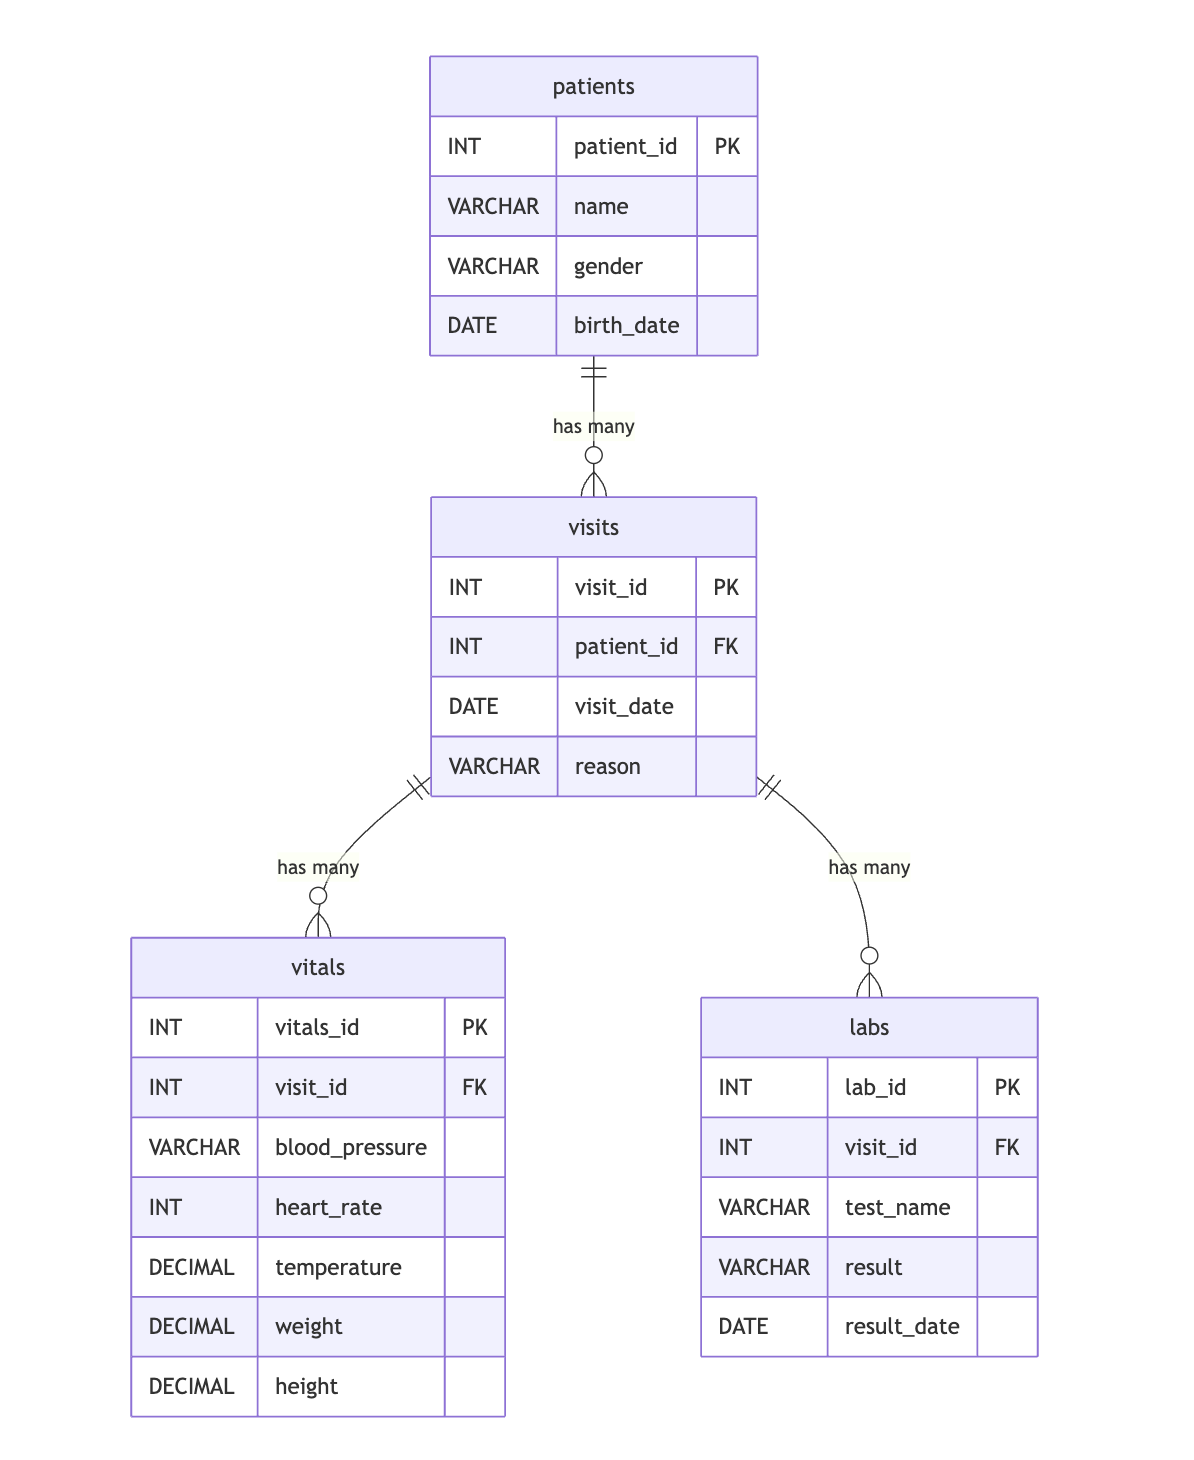

In [ ]:
# 여기에 코드를 입력하세요.


# 'patients': [
#         (1, 'John Doe', 'Male', '1980-05-15'),
#         (2, 'Jane Smith', 'Female', '1992-11-23'),
#         (3, 'Peter Jones', 'Male', '1975-03-10'),
#         (4, 'Alice Brown', 'Female', '2000-07-01'),
#         (5, 'Robert White', 'Male', '1968-09-20')
#     ],

with conn.cursor() as cur:
  # 여기에서 데이터를 분석
  # cur.execute("SELECT * FROM patients;")
  # result = cur.fetchone()
  # # results = cur.fetchall()
  # display(result)

  cur.execute("SELECT * FROM patients WHERE patient_id = %s OR patient_id = %s;", (2,3,))
  results = cur.fetchall()
  display(results)




((2, 'Jane Smith', 'Female', datetime.date(1992, 11, 23)),
 (3, 'Peter Jones', 'Male', datetime.date(1975, 3, 10)))

# ✅ 실습문제 (20분)

## 문제 1) 최근 방문 5개 기록 조회

visits 테이블에서 가장 최근 방문 5개의 기록을 조회하시오.  
환자 이름(name), 방문 날짜(visit_date), 방문 사유(reason)를 출력하세요.

In [ ]:
sql_1 = """
SELECT
  p.name,
  v.visit_date,
  v.reason
FROM visits v
JOIN patients p
  ON v.patient_id = p.patient_id
ORDER BY v.visit_date DESC
LIMIT 5;
"""

with conn.cursor() as cur:
  cur.execute(sql_1)
  results = cur.fetchall()

display(results)

(('Jane Smith', datetime.date(2023, 3, 10), 'Persistent cough'),
 ('Robert White', datetime.date(2023, 3, 1), 'Diabetes management'),
 ('Alice Brown', datetime.date(2023, 2, 10), 'Vaccination'),
 ('Peter Jones', datetime.date(2023, 2, 5), 'Knee pain'),
 ('John Doe', datetime.date(2023, 2, 1), 'Follow-up on blood pressure'))

## 문제 2) 심박수(heart_rate)가 90 이상인 환자 조회

vitals 테이블에서 heart_rate가 90 이상인 기록을 찾고,  
해당 환자의 이름(name), 방문 날짜(visit_date), 심박수(heart_rate)를 출력하세요.

In [ ]:
sql_2 = """
SELECT
  p.name,
  vs.visit_date,
  v.heart_rate
FROM vitals v
JOIN visits vs
  ON v.visit_id = vs.visit_id
JOIN patients p
  ON vs.patient_id = p.patient_id
WHERE v.heart_rate >= 90;
"""

with conn.cursor() as cur:
  cur.execute(sql_2)
  results = cur.fetchall()

display(results)

(('Jane Smith', datetime.date(2023, 1, 15), 98),
 ('Jane Smith', datetime.date(2023, 3, 10), 90))

## 문제 3) HbA1c 검사 결과가 7% 이상인 환자 조회

labs 테이블의 result 값은 '7.2%' 형태의 문자열입니다.  
문자열에서 '%' 기호를 제거하고 숫자로 변환하여  
7.0 이상인 HbA1c 결과를 가진 환자의 정보를 조회하세요.

출력 컬럼:
- 환자 이름(name)
- 검사명(test_name)
- 원본 결과(result)
- 검사 날짜(result_date)



### 힌트
```sql
-- 문자열 가공: '7.2%' -> '7.2'
REPLACE(l.result, '%', '')

-- 형 변환: 문자열을 숫자 DECIMAL 타입으로 변환
CAST(REPLACE(l.result, '%', '') AS DECIMAL(4,2))
```

In [ ]:
# 환자 이름(name)
# 검사명(test_name)
# 원본 결과(result)
# 검사 날짜(result_date)
sql_3 = """
SELECT
  p.name,
  l.test_name,
  l.result,
  l.result_date
FROM labs l
JOIN visits vs
  ON l.visit_id = vs.visit_id
JOIN patients p
  ON vs.patient_id = p.patient_id
WHERE l.test_name = 'HbA1c'
  AND CAST(
        REPLACE(l.result, '%', '') AS DECIMAL(4,2)
      ) >= 7.0;
"""

with conn.cursor() as cur:
  cur.execute(sql_3)
  results = cur.fetchall()

display(results)

(('Robert White', 'HbA1c', '7.2%', datetime.date(2023, 3, 2)),)